## Exercise 1: Data Analysis and Manipulation with Pandas
In this exercise, we will be working with two datasets: sales data and customer data. We will use pandas to perform various data analysis and manipulation tasks.

### Part 1: Loading Data
1. Load the sales data using pandas read_csv function and assign it to a variable called sales_data.
2. Load the customer data using pandas read_csv function and assign it to a variable called customer_data.

**Note: Both CSV files are located in the same directory as this Jupyter notebook.**

In [ ]:
import pandas as pd

In [ ]:
sales_data = pd.read_csv('/content/sales_data.csv')
customer_data =pd.read_csv('/content/customer_data.csv')

### Part 2: Data Exploration
In this exercise, we will explore the two datasets that we loaded in Part 1.

- Check the shape of both dataframes. How many rows and columns do they have?

In [ ]:
print(sales_data.shape)
print(customer_data.shape)

(30, 6)
(3, 5)


- Print the first 5 rows of both datasets.

In [ ]:
sales_data.head(5)

,Unnamed: 0,date,product,salesperson,units_sold,sales_amount
0,0,2022-01-01,B,Bob,7,27
1,1,2022-01-02,A,Alice,1,41
2,2,2022-01-03,B,Alice,8,33
3,3,2022-01-04,C,Charlie,6,80
4,4,2022-01-05,B,Bob,2,38


In [ ]:
customer_data.head(5)

,Unnamed: 0,name,state,salesperson,customer_id
0,0,Jeremie,CA,Alice,1
1,1,Mathilde,NY,Bob,2
2,2,Pierre,TX,Charlie,3


- Use the describe method to generate basic summary statistics for the sales_data DataFrame.



In [ ]:
sales_data.describe()

,Unnamed: 0,units_sold,sales_amount
count,30.000000,30.000000,30.000000
mean,14.500000,4.900000,64.133333
std,8.803408,2.591099,25.335995
min,0.000000,1.000000,20.000000
25%,7.250000,3.000000,41.000000
50%,14.500000,4.500000,67.000000
75%,21.750000,7.000000,86.500000
max,29.000000,9.000000,99.000000


- Use the groupby method to calculate the total sales amount and total units sold for each salesperson in the sales_data DataFrame.

In [ ]:
sales_data.groupby('salesperson')[["sales_amount","units_sold"]].sum()

,sales_amount,units_sold
salesperson,,
Alice,399,25
Bob,738,67
Charlie,787,55


- Use the groupby method to calculate the total sales amount and total units sold for each product in the sales_data DataFrame.

In [ ]:
sales_data.groupby('product')[["sales_amount","units_sold"]].sum()

,sales_amount,units_sold
product,,
A,656,42
B,828,75
C,440,30


- Use the merge method to merge the sales_data and customer_data DataFrames on the salesperson column. How many rows and columns does the resulting DataFrame have?

In [ ]:
# prompt: Use the merge method to merge the sales_data and customer_data DataFrames on the salesperson column. How many rows and columns does the resulting DataFrame have

merged_data = pd.merge(sales_data, customer_data, on="salesperson")
print(merged_data.shape)


- Use the groupby method to calculate the total sales amount and total units sold for each customer in the merged DataFrame.

In [ ]:
merged_data = pd.merge(sales_data,customer_data,on='salesperson',how='left')

### Part 3: Data Cleaning
In this exercise, we will clean the sales_data dataframe.

- Identify any missing values in the sales_data DataFrame. If there are any, fill them in with appropriate values.

In [ ]:
sales_data.isna().sum()

Unnamed: 0      0
date            0
product         0
salesperson     0
units_sold      0
sales_amount    0
dtype: int64

- Identify and remove any duplicates in the sales_data DataFrame.

In [ ]:
sales_data.duplicated().sum()

0

- Identify any missing values in the customer_data DataFrame. If there are any, fill them in with appropriate values.

In [ ]:
customer_data.isnull().sum()

Unnamed: 0     0
name           0
state          0
salesperson    0
customer_id    0
dtype: int64

- Identify and remove any duplicates in the customer_data DataFrame.

In [ ]:
customer_data.duplicated().sum()

0

### Part 4: Data Transformation

- Create a new column in the sales_data DataFrame called total_sales that is the product of the units_sold and sales_amount columns.

In [ ]:
sales_data['total_sales'] = sales_data['units_sold'] * sales_data['sales_amount']

- Create a new column in the sales_data DataFrame called year that is the year of the date column.

In [ ]:
sales_data.dtypes

Unnamed: 0       int64
date            object
product         object
salesperson     object
units_sold       int64
sales_amount     int64
total_sales      int64
dtype: object

In [ ]:
sales_data['date'] = pd.to_datetime(sales_data['date'],format='%Y-%m-%d')

In [ ]:
sales_data.dtypes

Unnamed: 0               int64
date            datetime64[ns]
product                 object
salesperson             object
units_sold               int64
sales_amount             int64
total_sales              int64
dtype: object

In [ ]:
sales_data['year'] = sales_data['date'].dt.year

In [ ]:
sales_data.head(5)

,Unnamed: 0,date,product,salesperson,units_sold,sales_amount,total_sales,year
0,0,2022-01-01,B,Bob,7,27,189,2022
1,1,2022-01-02,A,Alice,1,41,41,2022
2,2,2022-01-03,B,Alice,8,33,264,2022
3,3,2022-01-04,C,Charlie,6,80,480,2022
4,4,2022-01-05,B,Bob,2,38,76,2022


- Create a new DataFrame called sales_by_state that shows the total sales amount and total units sold for each state in the customer_data DataFrame.

In [ ]:
sales_by_state =merged_data.groupby('state')[['sales_amount','units_sold']].sum()

In [ ]:
sales_by_state

,sales_amount,units_sold
state,,
CA,399,25
NY,738,67
TX,787,55


- Create a new DataFrame called sales_by_month that shows the total sales amount and total units sold for each month in the sales_data DataFrame.

In [ ]:
sales_by_month =sales_data.groupby(sales_data['date'].dt.month)[['sales_amount','units_sold']].sum()

In [ ]:
sales_by_month

,sales_amount,units_sold
date,,
1,1924,147


### Part 5: Data Visualization

- Use the plot method to create a bar chart showing the total sales amount for each salesperson in the sales_data DataFrame.

<Axes: xlabel='salesperson'>

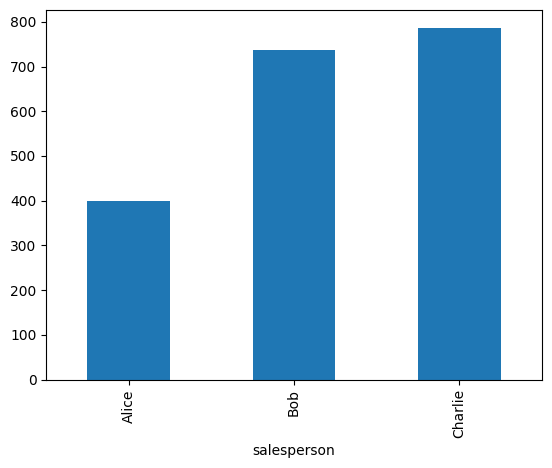

In [ ]:
sales_data.groupby('salesperson')["sales_amount"].sum().plot(kind='bar')

- Use the plot method to create a bar chart showing the total sales amount for each product in the sales_data DataFrame.

<Axes: xlabel='product'>

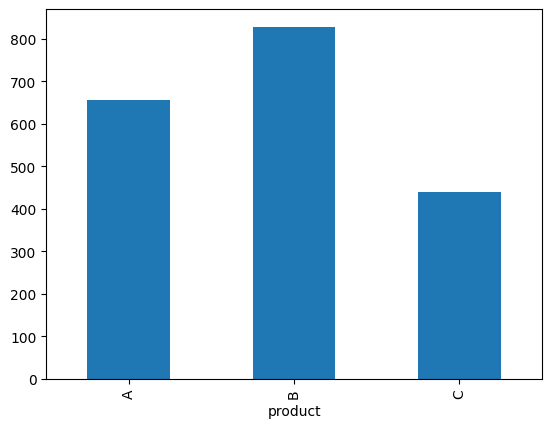

In [ ]:
sales_data.groupby('product')["sales_amount"].sum().plot(kind='bar')

- Use the plot method to create a bar chart showing the total sales amount for each state in the customer_data DataFrame.

<Axes: xlabel='state'>

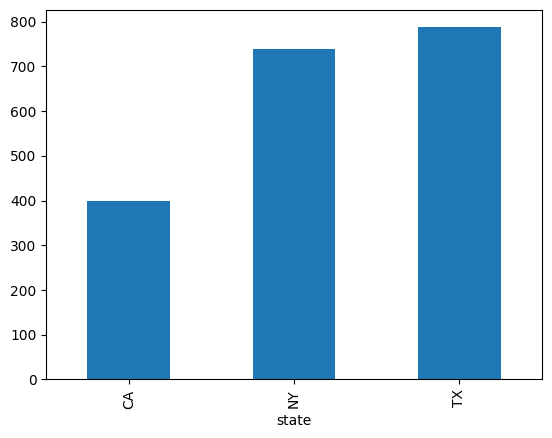

In [ ]:
merged_data.groupby('state')['sales_amount'].sum().plot(kind='bar')